In [1]:
import sys                           
import datetime
import calendar
import os                            
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns     
import altair as alt
%matplotlib inline
# jupyter notebook needs this option.
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
dataurl = 'https://data.bloomington.in.gov/dataset/94d3f457-57b5-45be-bee0-a0106f59b7ed/resource/8854ce02-e8f5-44b9-b85f-17f002a7d023/download/8854ce02-e8f5-44b9-b85f-17f002a7d023.csv'
df = pd.read_csv(dataurl)
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,NaN,Stray,NaN,Died in care,0,0,0
4,31469,2013-03-26 00:00:00,Incompatible,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,2013-03-30 00:00:00,Adoption,0.0,2017-05-08 00:00:00,Incompatible,NaN,Died in care,0,0,0


Let's convert the datetime columns to datetime objects for easier filtering later.

In [3]:
df['intakedate'] = pd.to_datetime(df['intakedate'], format='%Y-%m-%d %H:%M:%S')
df['movementdate'] = pd.to_datetime(df['movementdate'], format='%Y-%m-%d %H:%M:%S')
df['returndate'] = pd.to_datetime(df['returndate'], format='%Y-%m-%d %H:%M:%S')

We'll want to limit our data to a one-year period to observe seasonal trends. This data set runs through March 2018, so let's limit the data to 1 April 2017 through 31 March 2018.

In [4]:
df = df.loc[(df['intakedate'] >= '2017-04-01 00:00:00') & (df['intakedate'] < '2018-04-01 00:00:00')]
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
268,55340,2017-04-01 10:19:36,Incompatible,0,R1704014,NaN,Stella Blue,Fancy,White and Tan,Rat,...,2017-04-01,Transfer,0.0,NaT,Stray,NaN,Died in care,0,0,0
269,55341,2017-04-01 10:24:17,Incompatible,0,R1704015,NaN,Althea,Fancy,White and Tan,Rat,...,2017-04-01,Transfer,0.0,NaT,Stray,NaN,Died in care,0,0,0
270,55342,2017-04-01 10:24:17,Incompatible,0,R1704016,NaN,Salem,Fancy,White and Black,Rat,...,2017-04-01,Adoption,0.0,NaT,Stray,NaN,Died in care,0,0,0
271,55343,2017-04-01 10:24:17,Incompatible,0,R1704017,NaN,Quatro,Fancy,White and Black,Rat,...,2017-04-01,Adoption,0.0,NaT,Stray,NaN,Died in care,0,0,0
272,55344,2017-04-01 10:24:17,Incompatible,0,R1704018,NaN,Dennis the Menace,Fancy,White and Tan,Rat,...,2017-04-01,Adoption,0.0,NaT,Stray,NaN,Died in care,0,0,0


Some animals have multiple entries in the chart, for instance they left temporarily for fostering. As seen below, a cat called Tiger originally entered the shelter on 12 June 17, left for foster care on 16 June, returned from foster care on 28 July, and was finally adopted on 31 July.  

In [5]:
df[df.id==56171]

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
1137,56171,2017-06-12 13:20:58,Incompatible,0,C1706477,981020021045417,Tiger,Domestic Short Hair,Black and Brown,Cat,...,2017-06-16,Foster,0.0,2017-07-28,Stray,NaN,Court Order/ Legal,0,0,0
1138,56171,2017-06-12 13:20:58,Incompatible,0,C1706477,981020021045417,Tiger,Domestic Short Hair,Black and Brown,Cat,...,2017-07-31,Adoption,0.0,NaT,Stray,NaN,Court Order/ Legal,0,0,0


We can deduplicate the rows by `id`, selecting the last row in each group. This will preserve the original date of entry into the shelter, and the date of the final movement out of the shelter.

In [6]:
df = df.drop_duplicates(subset=['id'], keep='last')
df[df.id==56171]

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
1138,56171,2017-06-12 13:20:58,Incompatible,0,C1706477,981020021045417,Tiger,Domestic Short Hair,Black and Brown,Cat,...,2017-07-31,Adoption,0.0,NaT,Stray,NaN,Court Order/ Legal,0,0,0


We also want to limit our data to a one-year period to observe seasonal trends. This data set runs through March 2018, so let's limit the data to 1 April 2017 through 31 March 2018.

Let's explore some of the intakes. Specifically, I want to learn about the flow of intakes over time. Let's bin the intakes by month and day of week, and then compare cats to dogs.

In [7]:
def intake_month(x):
    return x.intakedate.strftime("%B")[:3]

def intake_day(x):
    return calendar.day_name[x.intakedate.weekday()][:3]

df['intake_month'] = df.apply(intake_month, axis=1)
df['intake_day'] = df.apply(intake_day, axis=1)

df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,intake_month,intake_day
268,55340,2017-04-01 10:19:36,Incompatible,0,R1704014,NaN,Stella Blue,Fancy,White and Tan,Rat,...,0.0,NaT,Stray,NaN,Died in care,0,0,0,Apr,Sat
269,55341,2017-04-01 10:24:17,Incompatible,0,R1704015,NaN,Althea,Fancy,White and Tan,Rat,...,0.0,NaT,Stray,NaN,Died in care,0,0,0,Apr,Sat
270,55342,2017-04-01 10:24:17,Incompatible,0,R1704016,NaN,Salem,Fancy,White and Black,Rat,...,0.0,NaT,Stray,NaN,Died in care,0,0,0,Apr,Sat
271,55343,2017-04-01 10:24:17,Incompatible,0,R1704017,NaN,Quatro,Fancy,White and Black,Rat,...,0.0,NaT,Stray,NaN,Died in care,0,0,0,Apr,Sat
272,55344,2017-04-01 10:24:17,Incompatible,0,R1704018,NaN,Dennis the Menace,Fancy,White and Tan,Rat,...,0.0,NaT,Stray,NaN,Died in care,0,0,0,Apr,Sat


Text(0.5,1,'Shelter intakes by Day of Week')

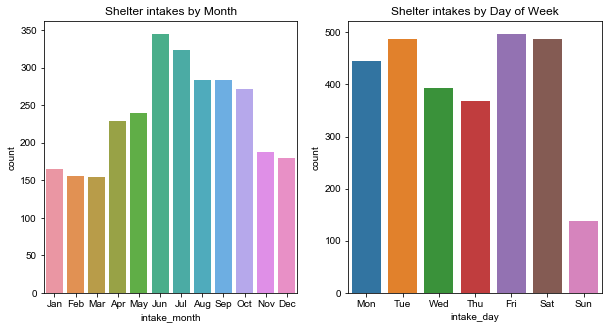

In [8]:
import seaborn as sns
from matplotlib import pyplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
#fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set_style("whitegrid")

# Plot intakes by month
sns.countplot(
    ax=ax1,
    x="intake_month", 
    data=df, 
    order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
).set_title(
    "Shelter intakes by Month"
)

sns.countplot(
    ax=ax2,
    x="intake_day", 
    data=df, 
    order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
).set_title(
    "Shelter intakes by Day of Week"
)


Annually, we see there's a leap starting in April, then another leap in June. Things are relatively quiet in the late fall and through the winter.

Weekly, we see the highest number of intakes is during the weekend, but, interestingly, relatively few on Sunday.

Let's break things down a little more to see if we can learn more about why animals are coming to the shelter. First, let's list all the discrete reasons that animals are brought to the shelter.

In [9]:
intake_reasons = df.intakereason.value_counts()
print(f"Intake Reasons:\n{intake_reasons}")

Intake Reasons:
Stray                          1390
Incompatible                    517
Litter relinquishment           187
Moving                          159
Transfer from Other Shelter      66
Unsuitable Accomodation          63
Police Assist                    61
Abandoned                        55
Owner Deceased                   50
Landlord issues                  45
Sick/Injured                     41
Allergies                        31
Born in Shelter                  30
Unable to Afford                 28
Biting                           24
Marriage/Relationship split      21
Rabies Monitoring                14
TNR - Trap/Neuter/Release        13
Owner Died                       11
Injured Wildlife                  8
Owner requested Euthanasia        3
Name: intakereason, dtype: int64


Ok, looks like it's mostly strays or compatibility issues. Let's assign these reasons to broader categories.

In [10]:
def intakereason_group(r):
    if   (r == "Stray"): return "Stray"
    elif (r == "Incompatible"): return "Incompatible"
    elif (r == "Litter relinquishment"): return "Relinquished"
    elif (r == "Moving"): return "Moving"
    elif (r == "Transfer from Other Shelter"): return "Transfer"
    elif (r == "TNR - Trap/Neuter/Release") : return "Trap/Neuter/Release"
    elif (r == "Born in Shelter") : return "Born in Shelter"
    elif (r == "Unsuitable Accomodation" or
          r == "Abandoned" or
          r == "Unable to Afford" or
          r == "Marriage/Relationship split" or
          r == "Owner Deceased" or
          r == "Owner Died" or
          r == "Landlord issues"): return "Unsuitable Home"
    elif (r == "Police Assist" or
          r == "Biting" or
          r == "Rabies Monitoring" or
          r == "Sick/Injured" or
          r == "Allergies" or
          r == "Injured Wildlife"): return "Sick/Unsafe"

df['intakereason_group'] = df.apply(lambda x: intakereason_group(x.intakereason), axis=1)

intakereason_groups = df.intakereason_group.value_counts()
print(f"Intake Reason Groups:\n{intakereason_groups}")

Intake Reason Groups:
Stray                  1390
Incompatible            517
Unsuitable Home         273
Relinquished            187
Sick/Unsafe             179
Moving                  159
Transfer                 66
Born in Shelter          30
Trap/Neuter/Release      13
Name: intakereason_group, dtype: int64


In [11]:
# A helper function to dynamically filter the dataframe
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

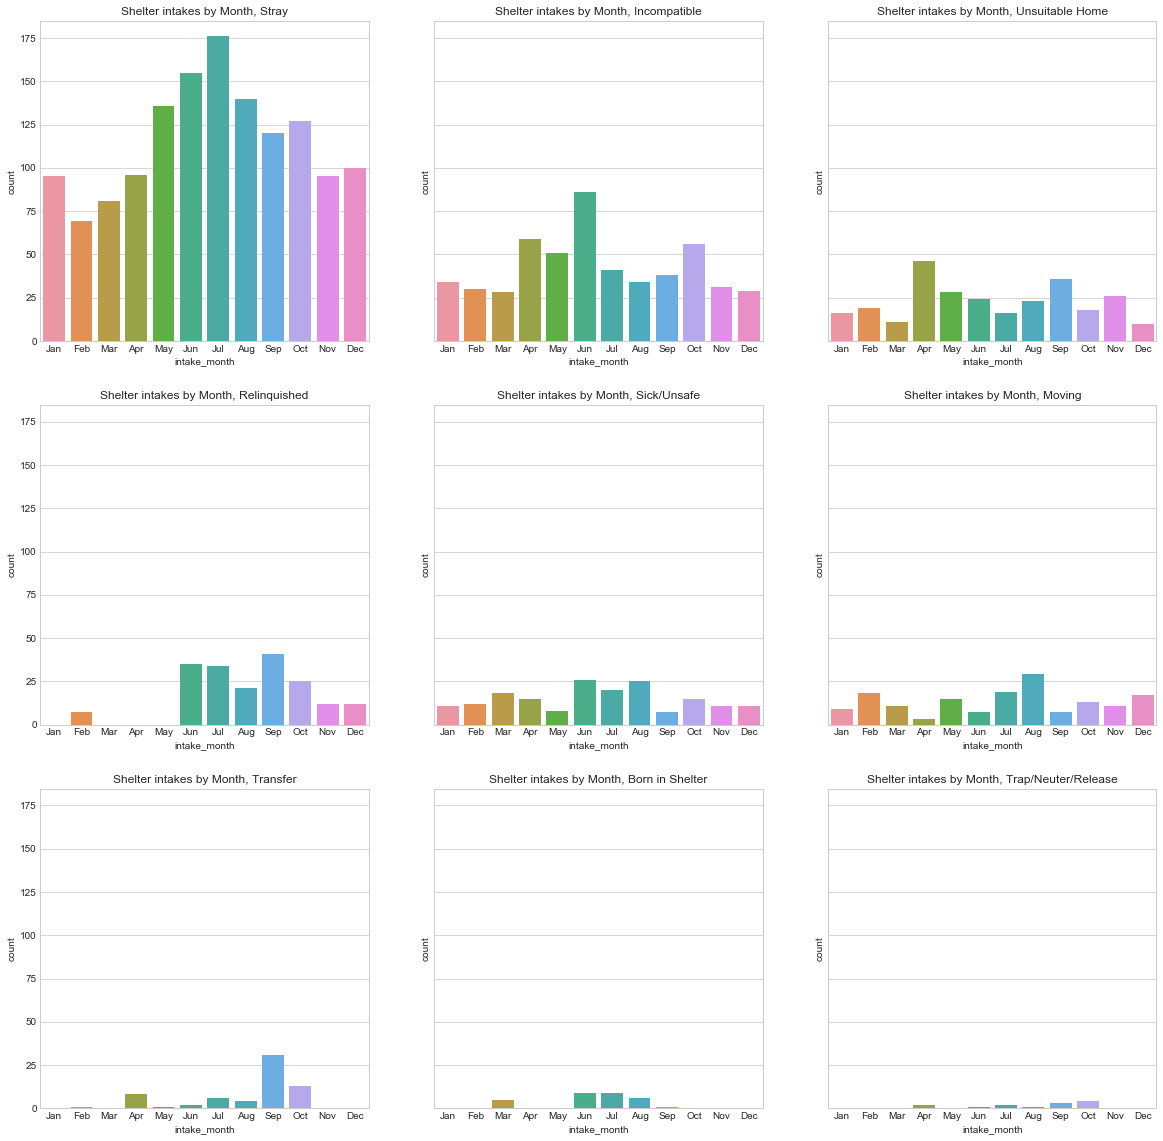

In [12]:
from matplotlib import pyplot

fig, ax = plt.subplots(ncols=3,nrows=3,figsize=(20,20),sharey=True)
for i,group in enumerate(df.intakereason_group.value_counts().keys()):
    sns.countplot(
        ax=(ax[(i//3)][(i%3)]),
        x="intake_month", 
        data=df.mask('intakereason_group', group),
        order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    ).set_title(
        f"Shelter intakes by Month, {group}"
    )

In [13]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

def intake_bisector(df, intakereason):
    def count_intake(month, speciesname):
        return len(df[
            (df.intake_month==month) & 
            (df.speciesname==speciesname) & 
            (df.intakereason==intakereason)].id)
    def dogs(month): return count_intake(month, "Dog")
    def cats(month): return count_intake(month, "Cat")
    
    
    return pd.DataFrame(data={
        'month': months,
        'cats': list(map(cats, months)),
        'dogs': list(map(dogs, months))
    })

intake_stray = intake_bisector(df, 'Stray')
intake_stray.head()

,month,cats,dogs
0,Jan,51,43
1,Feb,21,47
2,Mar,31,48
3,Apr,37,54
4,May,66,65


In [14]:
intake_stray.index

RangeIndex(start=0, stop=12, step=1)

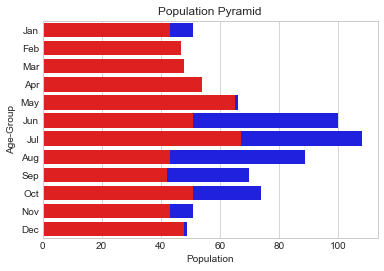

In [15]:
bar_plot = sns.barplot(x="cats",y="month", color="blue", label="Cats",data = intake_stray)
bar_plot = sns.barplot(x="dogs",y="month", color="red", label="Dogs",data = intake_stray)
bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid");

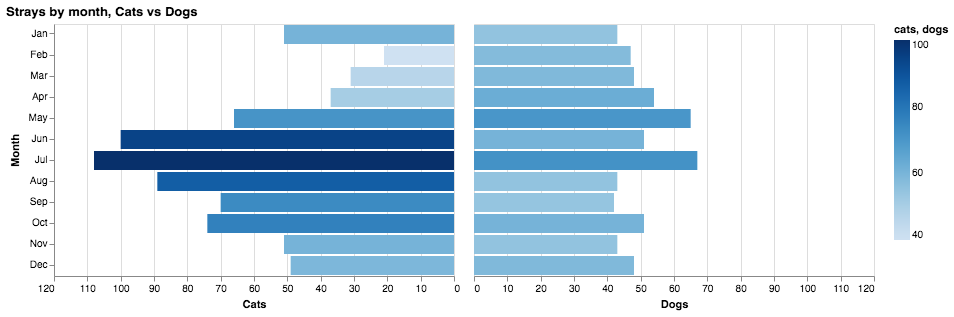

In [19]:
cats = alt.Chart(intake_stray).mark_bar().encode(
    x=alt.X('cats:Q',
            title='Cats',
            sort='descending',
            scale=alt.Scale(domain=(0,120))),
    y=alt.Y('month:N',
            title="Month",
            sort=months),
    color=alt.Color('cats')
)

dogs = alt.Chart(intake_stray).mark_bar().encode(
    x=alt.X('dogs:Q',
            title='Dogs',
            sort='ascending',
            scale=alt.Scale(domain=(0,120))),
    y=alt.Y('month:N', 
            sort=months,
            axis=None),
    color=alt.Color('dogs')
)

(cats | dogs).properties(
    title='Strays by month, Cats vs Dogs'
)